In [1]:
import numpy as np
import itertools
import matplotlib.cm as cm
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture


total_colores=10
palette=iter(cm.rainbow(np.linspace(0,1,total_colores)))


def plot_contour(model,xmin=-10,xmax=10):
    #Model tiene que tener la opción de calculo el valor de verosimilitud (score_samples)
    x = np.arange(xmin, xmax, .1)
    y = np.arange(xmin, xmax, .1)
    [xv, yv] = np.meshgrid(x, y)
    A=np.concatenate([np.expand_dims(xv.flatten(),axis=1),np.expand_dims(yv.flatten(),axis=1)],axis=1)
    plt.contourf(x,y,np.reshape(model.score_samples(A),[len(x),len(y)]),50,cmap='RdGy')



# Genera datos aleatorios con dos componentes
np.random.seed(0)
n_muestras = 500
C = np.eye(2)
X = np.r_[np.dot(np.random.randn(n_muestras, 2), C)+np.array([5, 5]),.7 * np.random.randn(n_muestras, 2) + np.array([-6, 3]),np.array([-3, -6])+np.dot(np.random.randn(n_muestras, 2), C)]


#Mezcla de Gaussianas estimadas por EM
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X)




GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

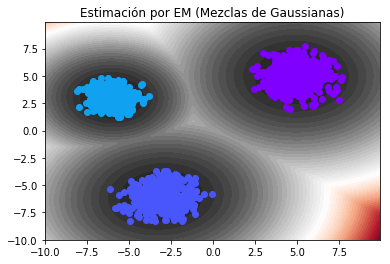

In [2]:

plot_contour(gmm)
labelpred=gmm.predict(X)
for i in np.unique(labelpred):
    plt.scatter(X[labelpred==i,0],X[labelpred==i,1],color=next(palette))
plt.title('Estimación por EM (Mezclas de Gaussianas)')
plt.show()

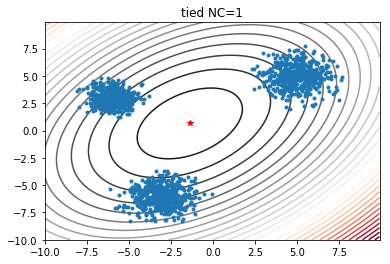

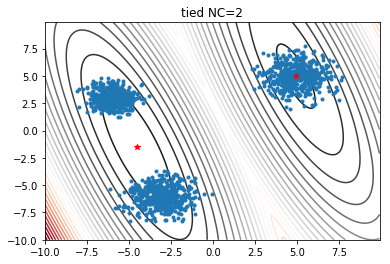

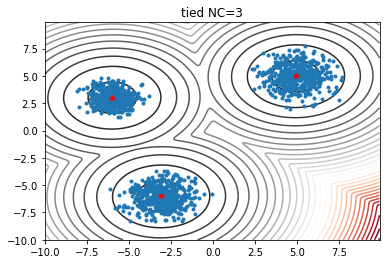

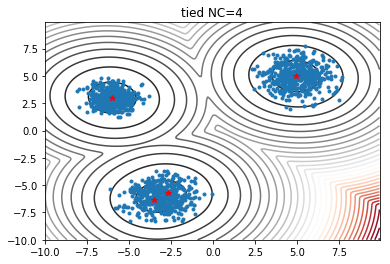

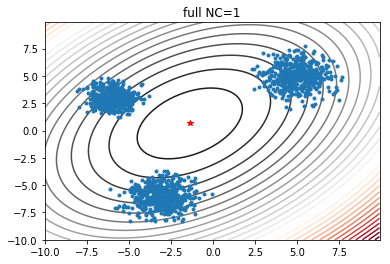

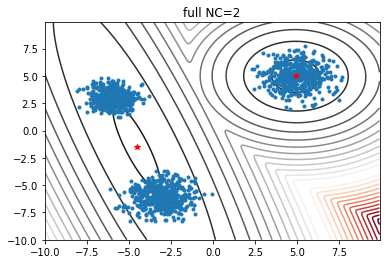

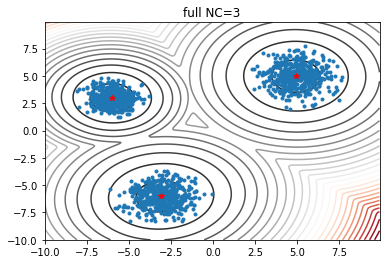

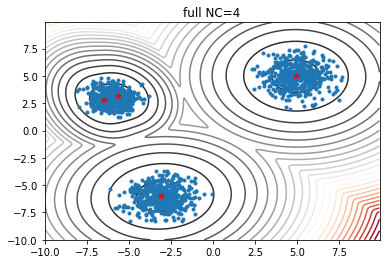

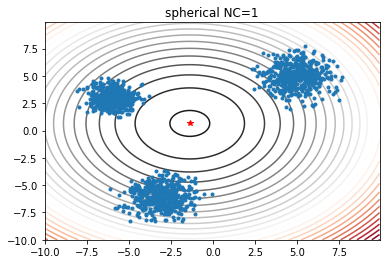

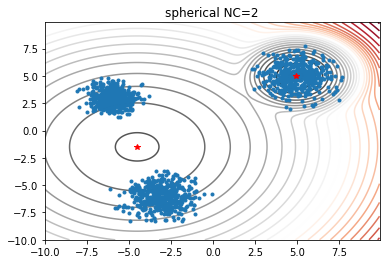

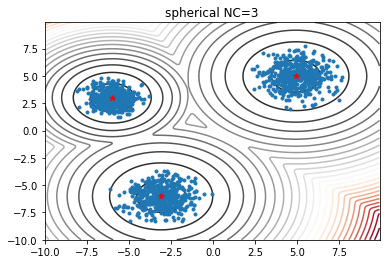

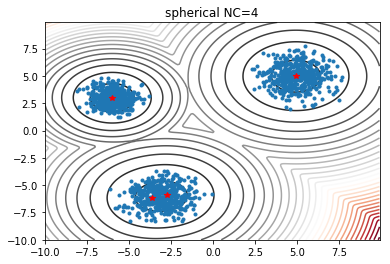

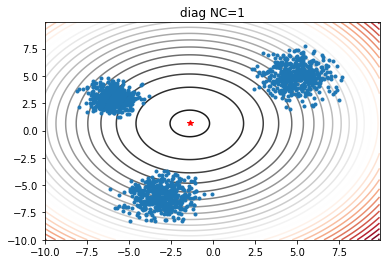

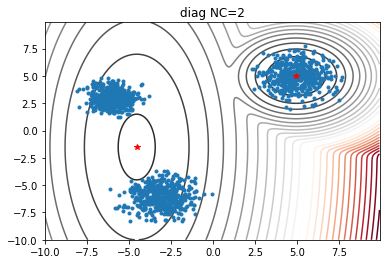

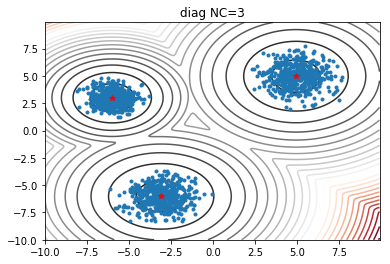

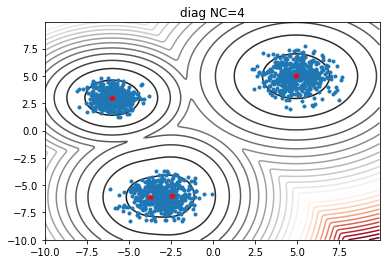

In [3]:
bic = []
aic = []
n_comp=[]
covtype=[]
listgmm=[]
n_components_range = range(1, 5)
cv_types = ['tied', 'full','spherical','diag']

#'full' (cada componente tiene su propia matriz de covarianza)
#'tied' (todos los componentes comparter la misma matriz de covarianza),
#'diag' (cada componente tiene su propia matriz de covarianza diagonal),
#'spherical' (cada componente tiene una matriz de covarianza I*\sigma).


x = np.arange(-10, 10, .1)
y = np.arange(-10, 10, .1)
[xv, yv] = np.meshgrid(x, y)
A=np.concatenate([np.expand_dims(xv.flatten(),axis=1),np.expand_dims(yv.flatten(),axis=1)],axis=1)
                
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        aic.append(gmm.aic(X))
        n_comp.append(n_components)
        covtype.append(cv_type)
        listgmm.append(gmm)
        z=np.reshape(gmm.score_samples(A),[len(x),len(y)])
        #plt.contourf(x,y,z,30)
        plt.title(cv_type+' '+'NC='+str(n_components))
        #plt.plot(gmm.means_,'.r')
        plt.contour(x, y, z,30, cmap='RdGy');
        plt.plot(X[:,0],X[:,1],'.')
        plt.plot(gmm.means_[:,0],gmm.means_[:,1],'*r')
        
        plt.show()
        plt.figure()
            
n_comp=np.array(n_comp)
bic=np.array(bic)
covtype=np.array(covtype)
#plt.plot([2,2])



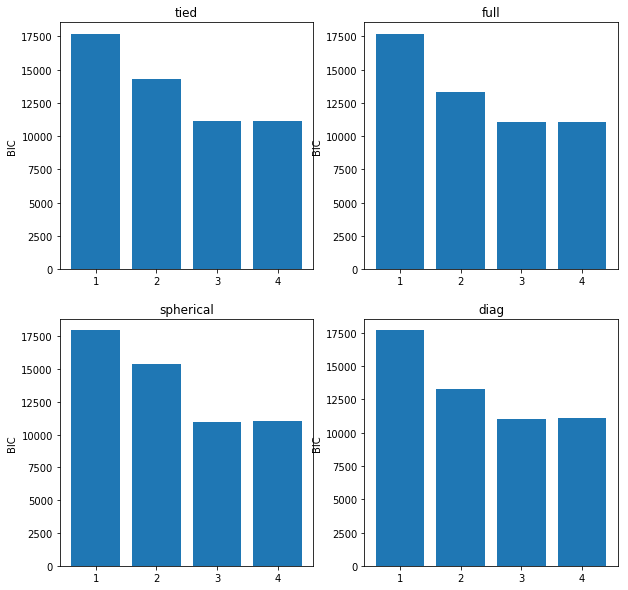

Mejor Modelo
Tipo de Matrix de Covarianza
spherical
Número de Componentes
3
BIC
10990.574583824296
Mejor Modelo
Tipo de Matrix de Covarianza
spherical
Número de Componentes
3
AIC
10932.129159566302


In [4]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('tied')
plt.ylabel('BIC')
plt.bar(n_comp[covtype=='tied'],bic[covtype=='tied'])
plt.subplot(222)
plt.title('full')
plt.ylabel('BIC')
plt.bar(n_comp[covtype=='full'],bic[covtype=='full'])
plt.subplot(223)
plt.title('spherical')
plt.ylabel('BIC')
plt.bar(n_comp[covtype=='spherical'],bic[covtype=='spherical'])
plt.subplot(224)
plt.title('diag')
plt.ylabel('BIC')
plt.bar(n_comp[covtype=='diag'],bic[covtype=='full'])
plt.show()

best=np.argmin(bic)
print('Mejor Modelo')
print('Tipo de Matrix de Covarianza')
print(covtype[best])
print('Número de Componentes')
print(n_comp[best])
print('BIC')
print(bic[best])

print('Mejor Modelo')
best=np.argmin(aic)
print('Tipo de Matrix de Covarianza')
print(covtype[best])
print('Número de Componentes')
print(n_comp[best])
print('AIC')
print(aic[best])

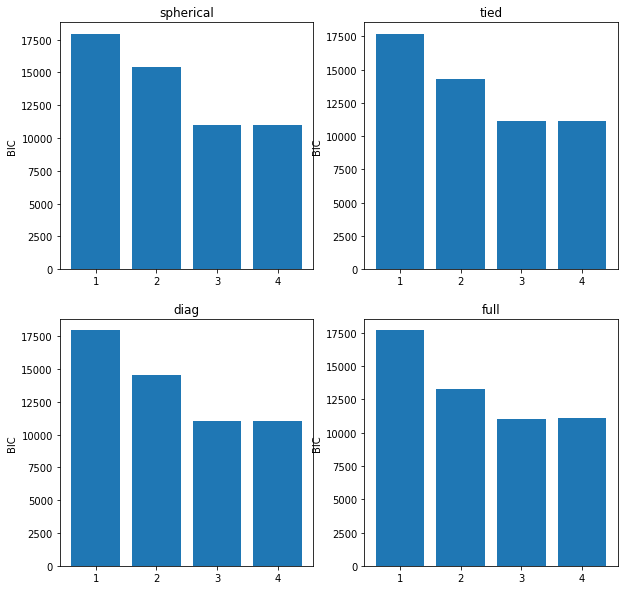

Mejor Modelo
Tipo de Matrix de Covarianza
spherical
Número de Componentes
3
BIC
10990.574583824296
***********************************
Mejor Modelo
Tipo de Matrix de Covarianza
spherical
Número de Componentes
3
AIC
10932.129159566302


In [5]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('spherical')
plt.ylabel('BIC')
plt.bar(n_comp[covtype=='spherical'],bic[covtype=='spherical'])
plt.subplot(222)
plt.title('tied')
plt.ylabel('BIC')
plt.bar(n_comp[covtype=='tied'],bic[covtype=='tied'])
plt.subplot(223)
plt.title('diag')
plt.ylabel('BIC')
plt.bar(n_comp[covtype=='diag'],bic[covtype=='diag'])
plt.subplot(224)
plt.title('full')
plt.ylabel('BIC')
plt.bar(n_comp[covtype=='full'],bic[covtype=='full'])
plt.show()

best=np.argmin(bic)
print('Mejor Modelo')
print('Tipo de Matrix de Covarianza')
print(covtype[best])
print('Número de Componentes')
print(n_comp[best])
print('BIC')
print(bic[best])
print('*'*35)
print('Mejor Modelo')
best=np.argmin(aic)
print('Tipo de Matrix de Covarianza')
print(covtype[best])
print('Número de Componentes')
print(n_comp[best])
print('AIC')
print(aic[best])